# TensorFlow

## Load & Clean Data

In [1]:
import pandas as pd

# csv_files = ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv',
#              'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv',
#              'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv',
#              'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
#              'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv',
#              'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
#              ]

# dfs = [pd.read_csv(file) for file in csv_files]

# df_tensorflow = pd.concat(dfs)

df_tensorflow = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')

df_tensorflow

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [2]:
df_tensorflow.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [3]:
df_tensorflow.isnull().sum(axis = 0)

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [4]:
df_tensorflow = df_tensorflow.dropna(axis = 0)
df_tensorflow

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [5]:
df_tensorflow.isnull().sum(axis = 0)

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Convert Categorical Variables to Numerical Values

In [6]:
catFeatures = ['wd', 'station']

df_tensorflow[catFeatures].describe(include = 'all').loc['unique', :]

wd         16
station     1
Name: unique, dtype: object

In [7]:
factors = pd.get_dummies(df_tensorflow[catFeatures], drop_first = True)

factors.head()

,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [8]:
df_tensorflow = df_tensorflow.drop(catFeatures, axis = 1)

df_tensorflow = pd.concat([df_tensorflow, factors], axis = 1)

df_tensorflow.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,...,1,0,0,0,0,0,0,0,0,0
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,...,0,1,0,0,0,0,0,0,0,0
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,...,0,1,0,0,0,0,0,0,0,0
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,...,0,1,0,0,0,0,0,0,0,0
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,...,1,0,0,0,0,0,0,0,0,0


## Split 80-20 into Train Data & Test Data

In [9]:
X = df_tensorflow.drop('PM2.5', axis = 1)

y = df_tensorflow['PM2.5']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print(f"X Train Shape: {X_train.shape} \nX Test Shape: {X_test.shape}")
print(f"y Train Shape: {y_train.shape} \ny Test Shape: {y_test.shape}")

X Train Shape: (24270, 30) 
X Test Shape: (6068, 30)
y Train Shape: (24270,) 
y Test Shape: (6068,)


## Preprocess the Data using the Normalization Method to Convert All Features into the Range of [0,1]

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Build a Neuron Network w/ Two Hidden Layers

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tensorflow_model = keras.Sequential()

# First Hidden Layer w/ 20 Neurons
tensorflow_model.add(layers.Dense(20, activation = 'relu'))

# Second Hidden Layer w/ 10 Neurons
tensorflow_model.add(layers.Dense(10, activation = 'relu'))

# Output Layer Has One & Only One Neuron
tensorflow_model.add(layers.Dense(1))

# Configure the Model by Choosing Optimizer & Loss Function
tensorflow_model.compile(optimizer = 'adam', loss = 'mse')

In [12]:
%%time

# Fix the seed
tf.random.set_seed(1)

# Fit the model & Save the Results in History
history = tensorflow_model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), verbose = 0)

CPU times: user 2min 6s, sys: 9 s, total: 2min 15s
Wall time: 2min 22s


In [13]:
# Convert the Train & Validation Loss to a DF
trainhist = pd.DataFrame(history.history)

# Add the epoch index
trainhist['epoch'] = history.epoch

# Look at the latest performance
trainhist.tail()

,loss,val_loss,epoch
95,611.324829,592.086426,95
96,610.959412,593.057861,96
97,609.162537,587.623169,97
98,608.497925,588.672485,98
99,607.096985,587.373291,99


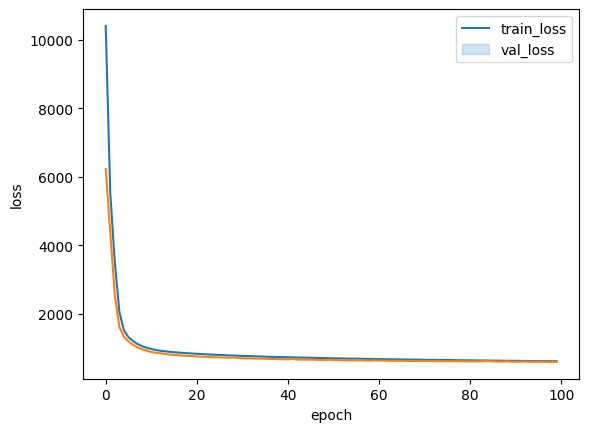

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot Train Loss
sns.lineplot(x = 'epoch', y = 'loss', data = trainhist)

# Plot Validation Loss
sns.lineplot(x = 'epoch', y = 'val_loss', data = trainhist)

# Add Legends
plt.legend(labels = ['train_loss', 'val_loss'])

#### Hello

## Hyperparameter Tuning using Keras-Tuner

In [15]:
import sys
# Check the Existence of the Keras-Tuner Library
if('keras-tuner' not in sys.modules):
  # If it was not installed, then install it
  !pip install -q -U keras-tuner

# Import the library of keras-tuner
  import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 28.5 MB/s eta 0:00:00
Using TensorFlow backend


In [16]:
%%time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
def model_builder(hp):
  model = keras.Sequential()

  # Search the # of Neurons from 20-50 w/ a stepsize of 5 in the First Hidden Layer
  hp_units1 = hp.Int('units1', min_value = 20, max_value = 50, step = 5)
  model.add(Dense(units = hp_units1, activation = 'relu'))

  # Tune the Dropout Rate in the First Hidden Layer
  # Search the Dropout Rate in the First Hidden Layer in the Range of .2--.8 w/ a StepSize of .1
  hp_dropout1 = hp.Float('rate1', min_value = .2, max_value = .8, step = .1)
  model.add(Dropout(rate = hp_dropout1))

  # Search the # of Neurons from 5-10 w/ a stepsize of 1 in the Second Hidden Layer
  hp_units2 = hp.Int('units2', min_value = 5, max_value = 10, step = 1)
  model.add(Dense(units = hp_units2, activation = 'relu'))

  # Tune the Dropout Rate in the Second Hidden Layer
  # Search the Dropout Rate in the Second Hidden Layer in the Range of .2--.8 w/ a StepSize of .1
  hp_dropout2 = hp.Float('rate2', min_value = .2, max_value = .8, step = .1)
  model.add(Dropout(rate = hp_dropout2))

  # Output Layer Has One & Only One Neuron
  model.add(Dense(1))

  # Tune the Learning Rate for the Optimizer
  # Search the Learning Rate from .01, .001, or .0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = [tf.keras.metrics.MeanSquaredError()]
                )
  return model

CPU times: user 1.28 ms, sys: 0 ns, total: 1.28 ms
Wall time: 1.56 ms


In [17]:
tuner = kt.Hyperband(model_builder, # Specify the model
                     objective = 'val_loss', # Specify the objective function
                     max_epochs = 100, # Specify the maximum epochs
                     directory = 'my_dir', # Specify the file path
                     project_name = 'tuningRegression'
                     )

In [18]:
import IPython

# Clear All the Training Outputs
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [19]:
# Perform the Search on the Defined Hyperparameter Space by Specifying the Callback to Clear the Training Outputs
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

Trial 254 Complete [00h 05m 24s]
val_loss: 976.0482177734375

Best val_loss So Far: 570.440673828125
Total elapsed time: 02h 48m 45s


In [20]:
# Get the Optimal Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

# Use F-Strings to Format the Outputs
print(f"""
The Optimal # of Units in the First Hidden Layer = {best_hps.get('units1')}.
The Optimal # of Units in the Second Hidden Layer = {best_hps.get('units2')}
The Optimal Dropout Rate in the First Hidden Layer = {best_hps.get('rate1')}.
The Optimal Dropout Rate in the Second Hidden Layer = {best_hps.get('rate2')}.
The Optimal Learning Rate for the Optimizer of Adam = {best_hps.get('learning_rate')}.
""")


The Optimal # of Units in the First Hidden Layer = 30.
The Optimal # of Units in the Second Hidden Layer = 8
The Optimal Dropout Rate in the First Hidden Layer = 0.2.
The Optimal Dropout Rate in the Second Hidden Layer = 0.2.
The Optimal Learning Rate for the Optimizer of Adam = 0.001.



In [21]:
# Build the Model w/ the Optimal Hyperparameters & Train it on the Data
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
759/759 [==============================] - 7s 7ms/step - loss: 9515.4512 - mean_squared_error: 9515.4512 - val_loss: 5809.2329 - val_mean_squared_error: 5809.2329
Epoch 2/100
759/759 [==============================] - 5s 6ms/step - loss: 5327.8423 - mean_squared_error: 5327.8423 - val_loss: 2841.6016 - val_mean_squared_error: 2841.6016
Epoch 3/100
759/759 [==============================] - 6s 8ms/step - loss: 3656.2300 - mean_squared_error: 3656.2300 - val_loss: 1855.5094 - val_mean_squared_error: 1855.5094
Epoch 4/100
759/759 [==============================] - 5s 6ms/step - loss: 3277.2932 - mean_squared_error: 3277.2932 - val_loss: 1656.2668 - val_mean_squared_error: 1656.2668
Epoch 5/100
759/759 [==============================] - 5s 6ms/step - loss: 2993.9705 - mean_squared_error: 2993.9705 - val_loss: 1353.9261 - val_mean_squared_error: 1353.9261
Epoch 6/100
759/759 [==============================] - 4s 6ms/step - loss: 2820.3481 - mean_squared_error: 2820.3481 - val_lo

In [22]:
def model_create():
  model = keras.Sequential()

  # First Hidden Layer w/ Optimal Neurons
  model.add(layers.Dense(best_hps.get('units1'), activation = 'relu'))

  # Add Optimal Droput Rate
  model.add(Dropout(best_hps.get('rate1')))

  # Second Hidden Layer w/ Optimal Neurons
  model.add(layers.Dense(best_hps.get('units2'), activation = 'relu'))

  # Add Optimal Dropout Rate
  model.add(Dropout(best_hps.get('rate2')))

  # Output Layer Has One & Only One Neuron
  model.add(layers.Dense(1))

  # Set the Optimal Learning Rate Found by the Tuner
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = .001),
                loss = 'mse',
                metrics = [tf.keras.metrics.MeanSquaredError()])

  return model

# Create the model
model = model_create()

In [23]:
# Specify the Directory to Save the Weights
import os
cp_path = 'training/cp.regr'
cp_dir = os.path.dirname(cp_path)

# Create a Callback to Save the Model's Weights
# We Only Save the Best Weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = cp_path, save_best_only = True,
                                                 save_weights_only = True,
                                                 verbose = 1)

# Train the Model & Specify the Defined Callback Using Callback=[]
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = [cp_callback])

Epoch 1/100
755/759 [============================>.] - ETA: 0s - loss: 7872.3906 - mean_squared_error: 7872.3906
Epoch 1: val_loss improved from inf to 4176.93945, saving model to training/cp.regr
759/759 [==============================] - 5s 5ms/step - loss: 7857.7759 - mean_squared_error: 7857.7759 - val_loss: 4176.9395 - val_mean_squared_error: 4176.9395
Epoch 2/100
748/759 [============================>.] - ETA: 0s - loss: 3308.1899 - mean_squared_error: 3308.1899
Epoch 2: val_loss improved from 4176.93945 to 1659.42761, saving model to training/cp.regr
759/759 [==============================] - 3s 4ms/step - loss: 3299.1716 - mean_squared_error: 3299.1716 - val_loss: 1659.4276 - val_mean_squared_error: 1659.4276
Epoch 3/100
747/759 [============================>.] - ETA: 0s - loss: 2197.8853 - mean_squared_error: 2197.8853
Epoch 3: val_loss improved from 1659.42761 to 1292.10388, saving model to training/cp.regr
759/759 [==============================] - 3s 4ms/step - loss: 2193.8

In [24]:
# First, Create the Model
model = model_create()

# Second, Load the Weights
model.load_weights(cp_path)

# Third, Evaluate the Model on the New Dataset
loss = model.evaluate(X_test, y_test, verbose = 2)

print(f"Reload model form file with loss: {loss[1]}.")

190/190 - 0s - loss: 592.6071 - mean_squared_error: 592.6071 - 465ms/epoch - 2ms/step
Reload model form file with loss: 592.6070556640625.


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

print(f"Mean Square Error is: {round(mean_squared_error(y_test, y_pred),2)}.")
print(f"Root Mean Square Error is: {round(mean_squared_error(y_test, y_pred, squared = False),2)}.")
print(f"Mean Absolute Error is: {round(mean_absolute_error(y_test, y_pred),2)}.")

190/190 [==============================] - 0s 2ms/step
Mean Square Error is: 592.61.
Root Mean Square Error is: 24.34.
Mean Absolute Error is: 16.25.


# PyTorch

## Load & Clean Data

In [74]:
import pandas as pd

# csv_files = ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv',
#              'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv',
#              'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv',
#              'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
#              'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv',
#              'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
#              ]

# dfs = [pd.read_csv(file) for file in csv_files]

# df_pytorch = pd.concat(dfs)

df_pytorch = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')

df_pytorch

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [75]:
df_pytorch.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [76]:
df_pytorch.isnull().sum(axis = 0)

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [77]:
df_pytorch = df_pytorch.dropna(axis = 0)

In [78]:
df_pytorch.isnull().sum(axis = 0)

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Convert Categorical Variables into Numerical Values

In [79]:
catFeatures = ['wd', 'station']

df_pytorch[catFeatures].describe(include = 'all').loc['unique', :]

wd         16
station     1
Name: unique, dtype: object

In [80]:
factors = pd.get_dummies(df_pytorch[catFeatures], drop_first = True)

factors.head()

,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [81]:
df_pytorch = df_pytorch.drop(catFeatures, axis = 1)

df_pytorch = pd.concat([df_pytorch, factors], axis = 1)

df_pytorch.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,...,1,0,0,0,0,0,0,0,0,0
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,...,0,1,0,0,0,0,0,0,0,0
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,...,0,1,0,0,0,0,0,0,0,0
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,...,0,1,0,0,0,0,0,0,0,0
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,...,1,0,0,0,0,0,0,0,0,0


## Split 80-20 into Train Data & Test Dataset

In [82]:
X = df_pytorch.drop('PM2.5', axis = 1)

y = df_pytorch['PM2.5']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

## Preprocess the Data using the Normalization Method to Convert All Features into the Range of [0,1]

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Build a Neuron Network w/ Two Hidden Layers

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32).reshape(-1,1))


print(f"X Train Shape: {X_train.shape} \nX Test Shape: {X_test.shape}")
print(f"y Train Shape: {y_train.shape} \ny Test Shape: {y_test.shape}")

X Train Shape: torch.Size([24270, 30]) 
X Test Shape: (6068, 30)
y Train Shape: torch.Size([24270, 1]) 
y Test Shape: (6068,)


In [85]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Specify the # of Neuron for the First Layer
hidden_size = [20, 10]

print(input_size)
print(output_size)

# Convert numpy to tensor from_numpy
X_test = torch.from_numpy(X_test.astype(np.float32))

30
1


In [86]:
# Define the Child Module Class Derivated from Parent Class of torch.nn.Module
class LinearRegressionModel(torch.nn.Module):
  # Define the Constructor
  def __init__(self, input_size, hidden_size, output_size, droprate):
    super(LinearRegressionModel, self).__init__()
    self.hidden1 = torch.nn.Linear(input_size, hidden_size[0])
    self.hidden1_drop = nn.Dropout(droprate)
    self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
    self.hidden2_drop = nn.Dropout(droprate)
    self.predict = torch.nn.Linear(hidden_size[1], output_size)

  # Overwrite the Forward Function in this Child Class
  def forward(self, x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden1_drop(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden2_drop(x))
    y_pred = self.predict(x)

    return y_pred

In [87]:
droprate = .3

model = LinearRegressionModel(input_size, hidden_size, output_size, droprate)

l = nn.MSELoss()

In [88]:
optimizer = torch.optim.Adam(model.parameters(), lr = .05)

In [89]:
%%time
from sklearn.metrics import mean_squared_error
# Fix the Random Seeds for torch & np
torch.manual_seed(1)
np.random.seed(0)

# Set the # of Epochs
num_epochs = 1000

train_loss = [None]*num_epochs
validation_loss = [None]*num_epochs

for epoch in range(num_epochs):
  # Forward Pass
  y_pred = model(X_train.requires_grad_())

  # Calculate the Loss
  loss = l(y_pred, y_train)

  # Set the Gradients to be Zero
  optimizer.zero_grad()

  # Backward Pass: Calculate Gradients
  loss.backward()

  # Update the Weights
  optimizer.step()

  # Stop Tracking the Gradients by Calling Detach since we don't use it anymore
  y_pred = model(X_test).detach().numpy()
  val_loss = mean_squared_error(y_test, y_pred)
  train_loss[epoch] = loss.item()
  validation_loss[epoch] = val_loss
  if epoch % 500 == 0:
    print(f'epoch {epoch}, loss = {loss.item()} and val_loss = {val_loss}')

epoch 0, loss = 14522.8779296875 and val_loss = 14313.590738931409
epoch 500, loss = 1934.825927734375 and val_loss = 1896.0068136511782
CPU times: user 12.6 s, sys: 48.3 ms, total: 12.6 s
Wall time: 12.8 s


In [90]:
# Convert the Train & Validation Loss to a DF
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': validation_loss, 'epoch': np.arange(num_epochs)})

# Look at the Latest Performance
trainhist.tail()

,train_loss,val_loss,epoch
995,1830.091431,1860.875774,995
996,1897.738892,1878.424450,996
997,1846.116333,1781.362623,997
998,1835.436035,1781.185242,998
999,1875.106079,1926.853635,999


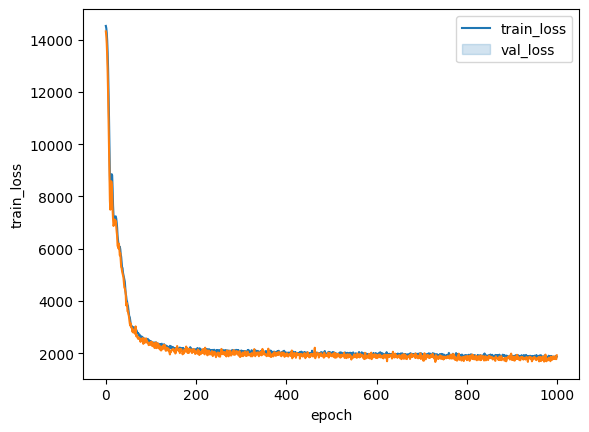

In [91]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot Train Loss
sns.lineplot(x = 'epoch', y = 'train_loss', data = trainhist)

# Plot Validation Loss
sns.lineplot(x = 'epoch', y = 'val_loss', data = trainhist)

# Add Legends
plt.legend(labels = ['train_loss', 'val_loss'])

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_test.shape

y_pred = model.predict(X_test)

'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))
'The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred,squared = False))
'The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred))

RuntimeError: ignored